# 📚 | Import

In [1]:
import matplotlib.pyplot as plt      # PLT PARA OS GRÁFICOS
import seaborn as sns               # SEABORN PARA OS GRÁFICOS
import pandas as pd                # PANDAS PARA O DF

df = pd.read_csv("/content/problem_3m_10j.csv") #dataset FSSP - Disponivel no GITHUB

# GITHUB -> https://github.com/akilelkamel/fssp-dataset/blob/main/probems/problem_3m_10j.csv

# O dataset utilizado foi obtido no repositório público FSSP Dataset (GitHub, Akil El Kamel, 2020)

##   Dataset com valores relacionados as maquinas e suas tarefas...
##   No github tem algumas variações do FSSP, optamos por usar o menor dataset com 3 maquinas e 10 jobs.
##   Com menos dados, fica mais facil a implementação do algoritmo "Branch and Bound".

## DF = Cada linha representa uma tarefa, e cada coluna representa uma máquina.
## O valor contido em cada célula indica o tempo necessário para a máquina executar a tarefa correspondente.

In [2]:
df.head() #LINHAS SÃO OS JOBS/ATIVIDADES E AS COLUNAS SÃO AS MAQUINAS

,Unnamed: 0,M1,M2,M3
0,J1,17,15,14
1,J2,18,16,6
2,J3,8,14,12
3,J4,1,15,10
4,J5,18,13,14


# 🔢 | Dados

In [3]:
# Todo o tratamento e análise dos dados abaixo:
df.info() # Informações dos tipos de dados -> Inteiros e Object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     object
 1   M1          10 non-null     int64 
 2   M2          10 non-null     int64 
 3   M3          10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 452.0+ bytes


In [4]:
#df.isnull().sum()         ### NÃO TEM FALTA DE DADOS
#df.duplicated().sum()     ### NÃO TEM DADOS DUPLICADOS

df.describe()

,M1,M2,M3
count,10.00000,10.000000,10.000000
mean,10.10000,12.400000,10.100000
std,7.14065,3.949684,5.021067
min,1.00000,5.000000,1.000000
25%,3.00000,10.000000,7.000000
50%,11.50000,14.000000,11.000000
75%,16.50000,15.000000,13.750000
max,18.00000,16.000000,17.000000


In [5]:
# Tirando os dados do tipo Object - removendo a coluna 'Unnamed: 0', por ser irrelevante.
df.drop(columns=['Unnamed: 0'], inplace=True)

# Padronizando os nomes das colunas e índices para melhorar a legibilidade.
df.columns = [f'Maquina_{i + 1}' for i in range(df.shape[1])]

df.index = [f'Tarefa_{i + 1}' for i in range(df.shape[0])]

# Todos os dados foram tratados, removendo a coluna do tipo object, não possui valores nulos no dataset.

# 📊 | Insights


In [6]:
# Transformação para fazer os gráficos..
df.columns = [col.strip().lower() for col in df.columns]
df.index.name = 'tarefas'

# df para uma "lista".
df_long = df.reset_index().melt(id_vars='tarefas',
                                var_name='maquinas',
                                value_name='tempo_tarefa')

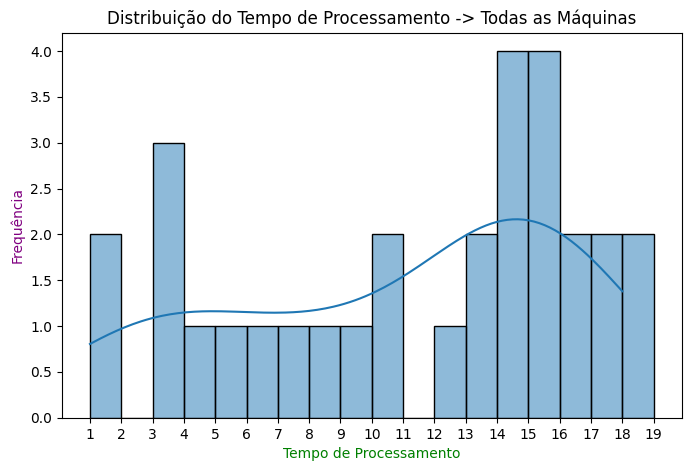

In [7]:
# Com base no gráficos e com a análise podemos tirar algumas conclusões para aplicar o algoritmo Branch and Bound (definindo prioridades e ordem de execução).

# RELAÇÃO ENTRE TEMPO E FREQUENCIA
plt.figure(figsize=(8,5))
sns.histplot(df_long['tempo_tarefa'], kde=True, bins=range(1, 20)) # Intervalo entre os valores
plt.title('Distribuição do Tempo de Processamento -> Todas as Máquinas')
plt.xlabel('Tempo de Processamento', color='green')
plt.ylabel('Frequência', color='purple')
plt.xticks(range(1, 20))
plt.show()
# Com o gráfico da para notar que as máquinas passam boa parte do tempo com tarefas.
# Frequencia relacionada a quantidade de tarefas...
# As maquinas trabalham com tarefas de complexidades distintas, podendo gerar desequilíbrio.

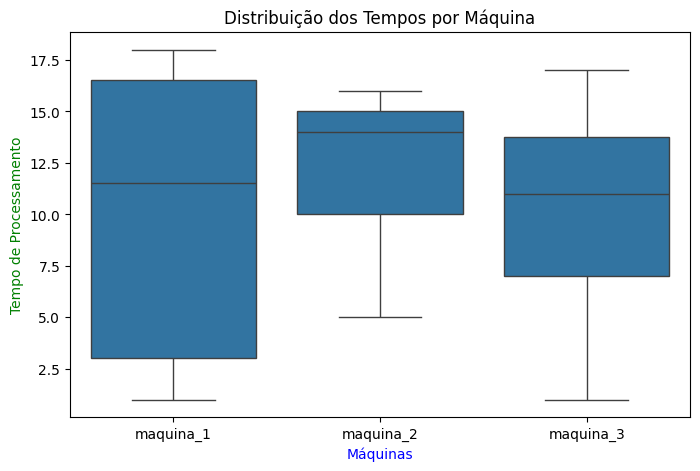

In [8]:
# Quanto tempo cada máquina faz determinadas tarefas..
plt.figure(figsize=(8,5))
sns.boxplot(x='maquinas', y='tempo_tarefa', data=df_long)
plt.title('Distribuição dos Tempos por Máquina')
plt.xlabel('Máquinas', color='blue')
plt.ylabel('Tempo de Processamento', color='green')
plt.show()

# Máquina 1: Apresenta tarefas rapidas e algumas muito demoradas, é bem instável.
# Máquina 2: Podemos notar valores parecidos, sem grandes diferenças..
# Máquina 3: Comportamento intermediário, não tem valores tão distintos igual a M1. Em relação com as outras máquinas está "equilibrada".

# Valores distintos podem gerar gargalos, causando esperas irregulares na linha de produção.

/tmp/ipython-input-3840236203.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='maquinas', y='tempo_tarefa', data=df_long, estimator='mean', ci=None)


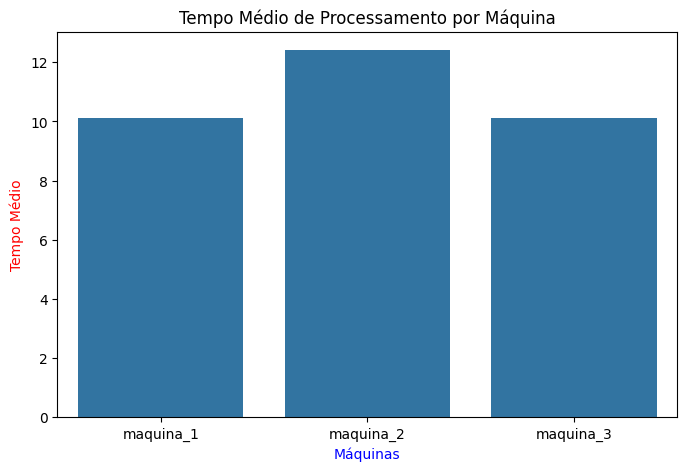

In [9]:
# Média de tempo em cada Máquina
plt.figure(figsize=(8,5))
sns.barplot(x='maquinas', y='tempo_tarefa', data=df_long, estimator='mean', ci=None)
plt.title('Tempo Médio de Processamento por Máquina')
plt.ylabel('Tempo Médio', color='red')
plt.xlabel('Máquinas', color='blue')
plt.show()

# 1 e 3 possuem médias semelhantes, supostamente tem um desempenho equilibrado.
# 2 possui o maior tempo médio, indício de gargalo...

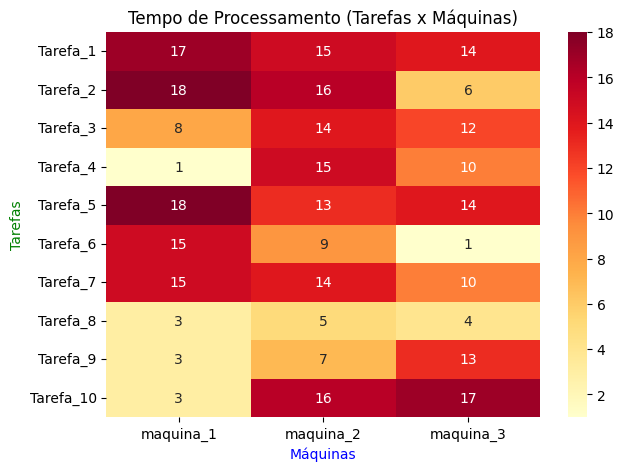

In [10]:
  # HEATMAP de tempo por tarefa em cada máquina.
plt.figure(figsize=(7,5))
sns.heatmap(df, annot=True, cmap='YlOrRd')
plt.title("Tempo de Processamento (Tarefas x Máquinas)")
plt.xlabel("Máquinas", color='blue')
plt.ylabel("Tarefas", color='green')
plt.show()

  # Podemos analisar o tempo de cada tarefa com base na cor, por exemplo a máquina 1 tem 2 tarefas com um tempo elevado.
  # O tempo de cada tarefa vária de acordo com a máquina. Para a tarefa 4 a primeira máquina demorou 1 unidade de tempo, a segunda máquina foi para 15.
  # Para a máquina 2, tem constâncias de tons escuros, reforçando que ela é o ponto de maior carga.
  # O heatmap facilita a visualização de gargalos.

In [11]:
# Conclusão
# Com base nos gráficos, a Máquina 2 tende a ser o gargalo, com maior tempo médio de execução.
# O objetivo é minimizar o tempo total de produção através da melhor sequência de tarefas entre as máquinas.
# Esse tipo de problema é classicamente resolvido por algoritmos como o Branch and Bound.

#📢 Problema de Otimização

In [12]:
# O dataset selecionado representa um conjunto de tarefas (jobs) que devem ser processadas em um conjunto de máquinas.
# Cada linha corresponde a uma tarefa, e cada coluna representa o tempo de processamento dessa tarefa em uma máquina específica.

# Este tipo de problema é conhecido como Flow Shop Scheduling Problem (FSSP).

# 🎯 Definição matemática

In [13]:
# Tarefas (N): quantidade de jobs que precisam ser processados.

# Máquinas (M): quantidade de máquinas pelas quais cada tarefa deve passar.

# Tempo de processamento: matriz tempo_processamento[i][j], onde i representa a tarefa e j representa a máquina.

## Variáveis de decisão -> S = [s1, s2, ..., sn] -> onde S é uma permutação das tarefas.
## Função Objetiva -> Minimizar o tempo total de conclusão -> Min Cmax​= max i,j ​(Ci,j​)  -> Ci,j representa o tempo de término da tarefa na máquina j.

## Restrições
# Cada tarefa deve passar por todas as máquinas na mesma ordem.
# Cada máquina só pode processar uma tarefa por vez.
# Uma tarefa só pode começar em uma máquina após terminar na máquina anterior.

## As restrições garantem a coerência adequado para a técnica Branch and Bound.

# 🐍 Makespan

In [14]:
# Algoritmo de avaliação de sequências de tarefas - Tempo total necessário para processar todas as tarefas
import itertools
import numpy as np

# Conversao do DataFrame para matriz NumPy
tempo_processamento = df.values

# (linhas) x (colunas)
n_tarefas, n_maquinas = tempo_processamento.shape

# Todas as permutações possiveis de sequencia de tarefas
sequencias = list(itertools.permutations(range(n_tarefas)))

def calcula_makespan(sequencia, matriz_tempo):

    n_jobs = len(sequencia)                  #TAREFAS
    n_machines = matriz_tempo.shape[1]       #MAQUINAS
    tempo = np.zeros((n_jobs, n_machines))   #TEMPO/VALORES

    for i, job in enumerate(sequencia):
        for m in range(n_machines):
            if i == 0 and m == 0:
                tempo[i, m] = matriz_tempo[job, m]
            elif i == 0:
                tempo[i, m] = tempo[i, m-1] + matriz_tempo[job, m]
            elif m == 0:
                tempo[i, m] = tempo[i-1, m] + matriz_tempo[job, m]
            else:
                tempo[i, m] = max(tempo[i-1, m], tempo[i, m-1]) + matriz_tempo[job, m]

    return tempo[-1, -1]  # Tempo total (makespan)

# SEQUENCIA ALEATORIO DE TAREFAS
seq_exemplo = (0, 1, 2, 3, 4)

retorno = calcula_makespan(seq_exemplo, tempo_processamento)
print(f"SEQUENCIA: {seq_exemplo} Tempo Total (MAKESPAN): {retorno}")

# Para a sequencia das tarefas de 1 ao 5 demora 107 segundos/minutos/horas
# Onde a tarefa 1 entra primeiro na máquina M1.
# Quando termina em M1, ela vai para M2, depois M3
# A Tarefa 2 só pode começar na M1 depois que a Tarefa 1 sair dela.
# Similar ao pipeline

Makespan para a sequência (0, 1, 2, 3, 4): 107.0


In [15]:
## Justificativa para o Branch and Bound

# O espaço de busca contém todas as permutações possíveis das tarefas (N!), o que torna inviável uma busca exaustiva para grandes valores de N.
# O método Branch and Bound é adequado porque:

# Permite explorar o espaço de busca de forma sistemática, avaliando parcialmente as soluções.

# Usa limites inferiores (bounds) para podar ramos que não podem levar à solução ótima.

# É amplamente aplicado em problemas de sequenciamento e agendamento (scheduling).